In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'08 Kasturi Sarode, 8th J, English exam .pdf'
'08 Kasturi Sarode, 8th J, Social Science exam.pdf'
'08 Kasturi Sarode, Drawing exam, memory drawing, 8th J.pdf'
 1.2.pdf
 16421783760065929761687776983239.jpg
 1.pdf
'1 pg.pdf'
 20210110_200846.jpg
 20210515_161408.mp4
 20210821_195323.jpg
 20210821_215810.jpg
 20210821_215825.jpg
 20210821_215906.jpg
 20210821_220219.jpg
 20220728_211647.jpg
 2.2.pdf
'231a68bfe5800dfea23221aa2b5065b2 (1).pdf'
 2.pdf
'9401_DSGT_UT1_Ketaki Sarode_1.jpg'
'9401_DSGT_UT1_Ketaki Sarode_2.jpg'
'9401_DSGT_UT1_Ketaki Sarode_3.jpg'
'9401_DSGT_UT1_Ketaki Sarode_4.jpg'
'9401_DSGT_UT1_Ketaki Sarode_5.jpg'
'9401_DSGT_UT1_Ketaki Sarode.pdf'
'9401_FEB_BEE (1).pdf'
 9401_FEB_BEE.pdf
'9401_FEB_Chemistry (1).pdf'
 9401_FEB_Chemistry.pdf
 9401_FEB_KetakiSarode_EM.pdf
 9401_FEB_KetakiSarode_Maths.pdf
'9401_FEB_Ketaki Sarode .pdf'
'9401_FEB_Ketaki Sarode_Physicexp..pdf'
 9401_FEB_Maths.pdf
 9401_FEB_MathsUT1.pdf
 9401_FEB_Mechanics.pdf
 9401_FEB_Physics.pdf
'9401_Ketaki Sarode

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

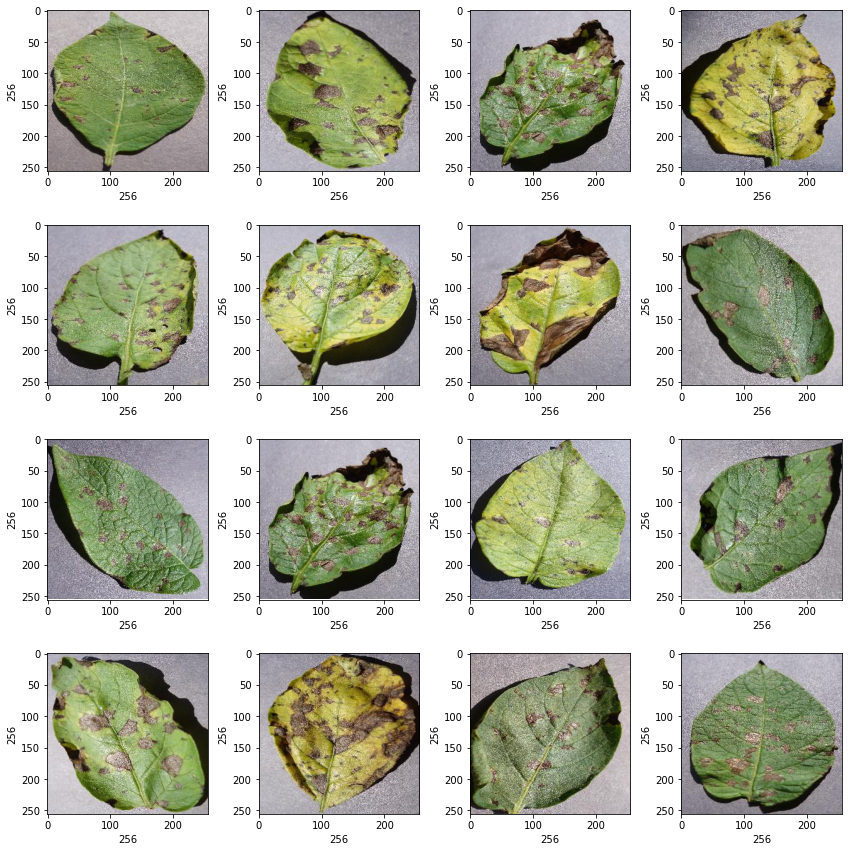

In [ ]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Data/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image


In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
dir = "/content/drive/My Drive/Data/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [ ]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    185
dtype: int64

In [ ]:
image_list[0].shape

(256, 256, 3)

In [ ]:
label_list = np.array(label_list)
label_list.shape

(785,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
4/4 [==============================] - 17s 4s/step - loss: 1.0524 - accuracy: 0.3785 - val_loss: 1.0283 - val_accuracy: 0.3968
Epoch 2/50
4/4 [==============================] - 16s 4s/step - loss: 1.0145 - accuracy: 0.3825 - val_loss: 0.9946 - val_accuracy: 0.3968
Epoch 3/50
4/4 [==============================] - 21s 6s/step - loss: 0.9768 - accuracy: 0.3825 - val_loss: 0.9621 - val_accuracy: 0.3968
Epoch 4/50
4/4 [==============================] - 15s 4s/step - loss: 0.9391 - accuracy: 0.3825 - val_loss: 0.9219 - val_accuracy: 0.3968
Epoch 5/50
4/4 [==============================] - 17s 4s/step - loss: 0.8968 - accuracy: 0.3825 - val_loss: 0.8786 - val_accuracy: 0.4127
Epoch 6/50
4/4 [==============================] - 15s 4s/step - loss: 0.8520 - accuracy: 0.4263 - val_loss: 0.8357 - val_accuracy: 0.4841
Epoch 7/50
4/4 [==============================] - 15s 4s/step - loss: 0.8075 - accuracy: 0.6056 - val_loss: 0.7936 - val_accuracy: 0.5635
Epoch 8/50
4/4 [==================

In [ ]:
model.save("/content/drive/My Drive/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

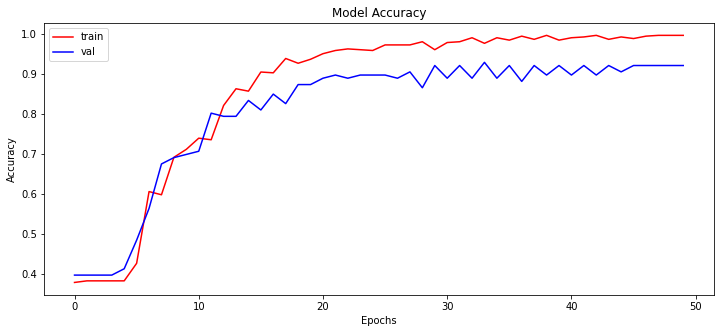

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
5/5 [==============================] - 2s 285ms/step - loss: 0.3274 - accuracy: 0.9299
Test Accuracy: 92.99362897872925


In [ ]:
y_pred = model.predict(x_test)

5/5 [==============================] - 1s 279ms/step


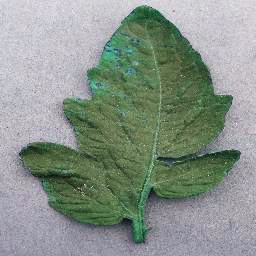

In [ ]:
img = array_to_img(x_test[10])
img

In [ ]:
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust
